In [71]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=60, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


## Nash DQN Results

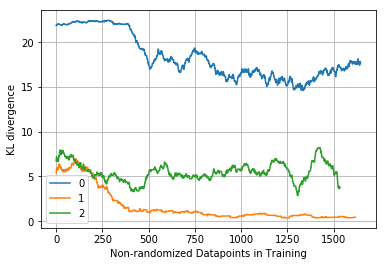

In [172]:
path_prefix = './data/nash_'
kl = np.load(path_prefix+'kl3.npy', allow_pickle=True)
for i, kl4trans in enumerate(kl):
    plt.plot(smooth(np.array(kl4trans)), label=i)
plt.xlabel('Non-randomized Datapoints in Training')
plt.ylabel('KL divergence')
plt.legend()
plt.grid()
plt.savefig(path_prefix+'kl_test.pdf')

## Nash DQN with Exploiter Results

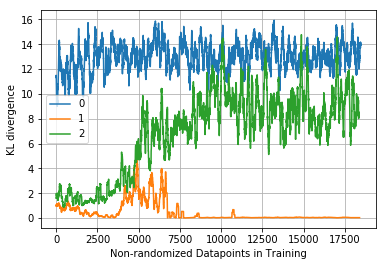

In [ ]:
path_prefix = './data/nash_exploiter_'
kl = np.load(path_prefix+'kl3.npy', allow_pickle=True)
for i, kl4trans in enumerate(kl):
    plt.plot(smooth(np.array(kl4trans)), label=i)
plt.xlabel('Non-randomized Datapoints in Training')
plt.ylabel('KL divergence')
plt.legend()
plt.grid()
plt.savefig(path_prefix+'kl_test2.pdf')

## Nash DQN Results

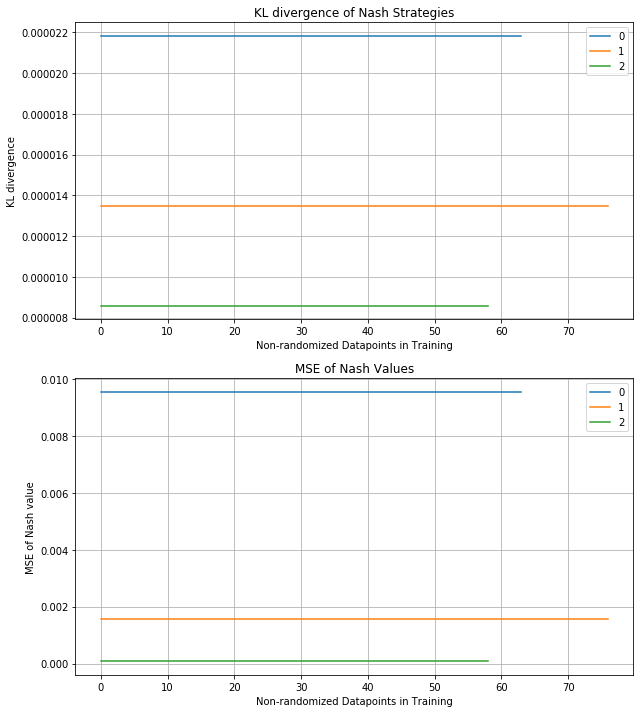

In [175]:
import pickle
def load_obj(path_prefix):
    with open(path_prefix + 'simple_mdp_log.pkl', 'rb') as f:
        return pickle.load(f)
path_prefix = 'data/nash_dqn_'
data = load_obj(path_prefix)
# print(data)
fig, axs = plt.subplots(2, figsize=(10,12))

kl = data['kl_nash_dist']
for i, kl4trans in enumerate(kl):
    axs[0].plot(smooth(np.array(kl4trans)), label=i)
axs[0].set_xlabel('Non-randomized Datapoints in Training')
axs[0].set_ylabel('KL divergence')
axs[0].legend()
axs[0].grid()
axs[0].set_title('KL divergence of Nash Strategies')
# axs[0].savefig(path_prefix+'kl_dist.pdf')

mse = data['mse_nash_v']
for i, mse4trans in enumerate(mse):
    axs[1].plot(smooth(np.array(mse4trans)), label=i)
axs[1].set_xlabel('Non-randomized Datapoints in Training')
axs[1].set_ylabel('MSE of Nash value')
axs[1].legend()
axs[1].grid()
axs[1].set_title('MSE of Nash Values')
# axs[1].savefig(path_prefix+'mse_v.pdf')
plt.savefig(path_prefix+'test.pdf')

## Nash DQN with Exploiter Results

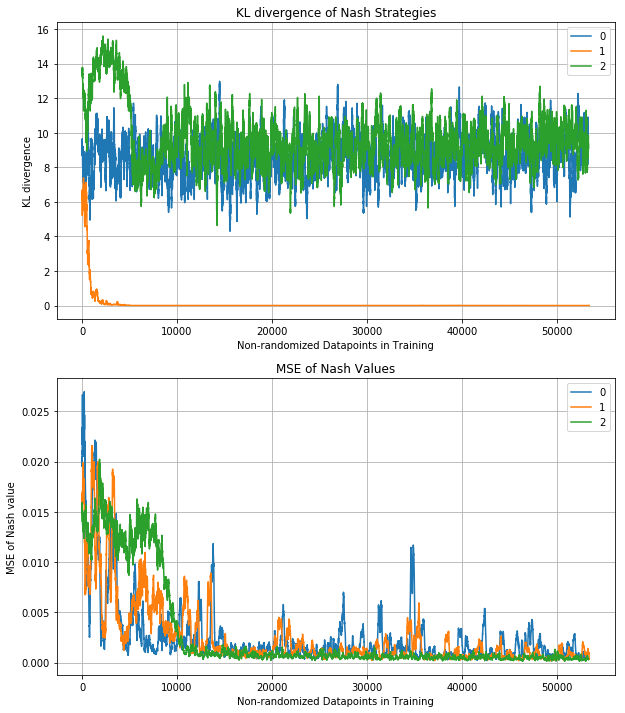

In [166]:
import pickle
def load_obj(path_prefix):
    with open(path_prefix + 'simple_mdp_log.pkl', 'rb') as f:
        return pickle.load(f)
path_prefix = 'data/nash_dqn_exploiter_'
data = load_obj(path_prefix)
# print(data)
fig, axs = plt.subplots(2, figsize=(10,12))

kl = data['kl_nash_dist']
for i, kl4trans in enumerate(kl):
    axs[0].plot(smooth(np.array(kl4trans)), label=i)
axs[0].set_xlabel('Non-randomized Datapoints in Training')
axs[0].set_ylabel('KL divergence')
axs[0].legend()
axs[0].grid()
axs[0].set_title('KL divergence of Nash Strategies')
# axs[0].savefig(path_prefix+'kl_dist.pdf')

mse = data['mse_nash_v']
for i, mse4trans in enumerate(mse):
    axs[1].plot(smooth(np.array(mse4trans)), label=i)
axs[1].set_xlabel('Non-randomized Datapoints in Training')
axs[1].set_ylabel('MSE of Nash value')
axs[1].legend()
axs[1].grid()
axs[1].set_title('MSE of Nash Values')
# axs[1].savefig(path_prefix+'mse_v.pdf')
plt.savefig(path_prefix+'test.pdf')